In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline
import os

In [2]:
df_adm = pd.read_csv("D:/Downloads_2021/PacMed/Pacmed_Data_Science_Assignment/admission.csv", delimiter = ";")
df_age = pd.read_csv("D:/Downloads_2021/PacMed/Pacmed_Data_Science_Assignment/age.csv", delimiter = ";", index_col = 0)
df_signal = pd.read_csv("D:/Downloads_2021/PacMed/Pacmed_Data_Science_Assignment/signal.csv", delimiter = ";", index_col = 0,  parse_dates =True)

# D:/Downloads_2021/PacMed/Pacmed_Data_Science_Assignment

In [3]:
df_adm

,Unnamed: 0,pat_id,date_admission,date_discharge
0,19292,1081,2014-05-14,2014-05-16
1,19293,1304,2014-06-13,2014-06-14
2,19295,1101,2014-05-14,2014-05-17
3,19298,895,2014-06-24,2014-06-25
4,19299,1468,2014-07-24,2014-07-25
...,...,...,...,...
1564,24154,927,2016-09-10,2016-09-11
1565,24156,514,2016-08-11,2016-08-12
1566,24161,775,2016-08-21,2016-08-27
1567,24164,383,2016-08-02,2016-08-03


In [4]:

# print(df_signal.columns)

# dropping columns using index "0"
df_signal.drop(df_signal.columns[[0]], axis=1, inplace=True) 
df_adm.drop(df_adm.columns[[0]], axis=1, inplace=True) 

df_signal

,pat_id,day,hour,parameter,value
0,0,2016-01-05,23,blood_pressure,104.543181
1,0,2016-01-06,0,blood_pressure,110.542544
2,0,2016-01-06,1,blood_pressure,133.832002
3,0,2016-01-06,2,blood_pressure,133.067666
4,0,2016-01-06,3,blood_pressure,134.566003
...,...,...,...,...,...
99909,1568,2016-01-19,10,blood_pressure,143.166335
99910,1568,2016-01-19,11,blood_pressure,145.432503
99911,1568,2016-01-19,12,blood_pressure,144.899670
99912,1568,2016-01-19,12,respiration_rate,4.000000


In [28]:

df_adm

,pat_id,date_admission,date_discharge
0,1081,2014-05-14,2014-05-16
1,1304,2014-06-13,2014-06-14
2,1101,2014-05-14,2014-05-17
3,895,2014-06-24,2014-06-25
4,1468,2014-07-24,2014-07-25
...,...,...,...
1564,927,2016-09-10,2016-09-11
1565,514,2016-08-11,2016-08-12
1566,775,2016-08-21,2016-08-27
1567,383,2016-08-02,2016-08-03


In [35]:
len(np.unique(df_adm["pat_id"]))

1495

In [29]:
np.unique(df_age["pat_id"])

array([   0,    1,    2, ..., 1566, 1567, 1568], dtype=int64)

In [30]:
print("Unique pat_id  in age:", len(np.unique(df_age["pat_id"])) )
print("Unique pat_id in admission :", len(np.unique(df_adm["pat_id"])) )
print("Unique pat_id in signal :", len(np.unique(df_signal["pat_id"])) )

print("Unique ages : ", len(np.unique(df_age["age"])) )

Unique pat_id  in age: 1495
Unique pat_id in admission : 1495
Unique pat_id in signal : 1492
Unique ages :  77


In [7]:
df =df_adm.merge( df_age,on="pat_id", how = "left" ,validate='many_to_many')
df

,pat_id,date_admission,date_discharge,age
0,1081,2014-05-14,2014-05-16,56.0
1,1304,2014-06-13,2014-06-14,56.0
2,1101,2014-05-14,2014-05-17,76.0
3,895,2014-06-24,2014-06-25,46.0
4,1468,2014-07-24,2014-07-25,57.0
...,...,...,...,...
1564,927,2016-09-10,2016-09-11,73.0
1565,514,2016-08-11,2016-08-12,42.0
1566,775,2016-08-21,2016-08-27,61.0
1567,383,2016-08-02,2016-08-03,34.0


In [14]:
d.isnull().any()


pat_id            False
day               False
hour              False
parameter         False
value             False
date_admission    False
date_discharge    False
age               False
dtype: bool

In [13]:
d = d.merge(df_age, on="pat_id", how = "inner" )
d

,pat_id,day,hour,parameter,value,date_admission,date_discharge,age
0,0,2016-01-05,23,blood_pressure,104.543181,2016-01-05,2016-01-07,35.0
1,0,2016-01-06,0,blood_pressure,110.542544,2016-01-05,2016-01-07,35.0
2,0,2016-01-06,1,blood_pressure,133.832002,2016-01-05,2016-01-07,35.0
3,0,2016-01-06,2,blood_pressure,133.067666,2016-01-05,2016-01-07,35.0
4,0,2016-01-06,3,blood_pressure,134.566003,2016-01-05,2016-01-07,35.0
...,...,...,...,...,...,...,...,...
109047,1568,2016-01-19,10,blood_pressure,143.166335,2016-01-18,2016-01-19,64.0
109048,1568,2016-01-19,11,blood_pressure,145.432503,2016-01-18,2016-01-19,64.0
109049,1568,2016-01-19,12,blood_pressure,144.899670,2016-01-18,2016-01-19,64.0
109050,1568,2016-01-19,12,respiration_rate,4.000000,2016-01-18,2016-01-19,64.0


In [11]:
d =  df_signal.merge( df_adm,on="pat_id", how = "inner" ,validate='many_to_many')


,pat_id,day,hour,parameter,value,date_admission,date_discharge
0,0,2016-01-05,23,blood_pressure,104.543181,2016-01-05,2016-01-07
1,0,2016-01-06,0,blood_pressure,110.542544,2016-01-05,2016-01-07
2,0,2016-01-06,1,blood_pressure,133.832002,2016-01-05,2016-01-07
3,0,2016-01-06,2,blood_pressure,133.067666,2016-01-05,2016-01-07
4,0,2016-01-06,3,blood_pressure,134.566003,2016-01-05,2016-01-07
...,...,...,...,...,...,...,...
113949,1568,2016-01-19,10,blood_pressure,143.166335,2016-01-18,2016-01-19
113950,1568,2016-01-19,11,blood_pressure,145.432503,2016-01-18,2016-01-19
113951,1568,2016-01-19,12,blood_pressure,144.899670,2016-01-18,2016-01-19
113952,1568,2016-01-19,12,respiration_rate,4.000000,2016-01-18,2016-01-19


In [5]:
data =  df_age.merge( df_adm,on="pat_id", how = "inner" ,validate='many_to_many')
data

,pat_id,age,date_admission,date_discharge
0,0,35.0,2016-01-05,2016-01-07
1,1,77.0,2014-07-04,2014-07-06
2,3,61.0,2014-10-16,2014-10-20
3,4,27.0,2015-02-06,2015-02-07
4,5,67.0,2014-12-06,2014-12-08
...,...,...,...,...
1495,1564,87.0,2016-07-29,2016-07-30
1496,1565,68.0,2015-04-21,2015-04-22
1497,1566,73.0,2015-01-10,2015-01-10
1498,1567,83.0,2015-01-31,2015-02-01


In [32]:
data = df_signal.merge(data, on="pat_id", how = "inner",validate='many_to_many' )
data

#  df_signal.merge( df_age,on="pat_id", how = "left")

,pat_id,day,hour,parameter,value,age,date_admission,date_discharge
0,0,2016-01-05,23,blood_pressure,104.543181,35.0,2016-01-05,2016-01-07
1,0,2016-01-06,0,blood_pressure,110.542544,35.0,2016-01-05,2016-01-07
2,0,2016-01-06,1,blood_pressure,133.832002,35.0,2016-01-05,2016-01-07
3,0,2016-01-06,2,blood_pressure,133.067666,35.0,2016-01-05,2016-01-07
4,0,2016-01-06,3,blood_pressure,134.566003,35.0,2016-01-05,2016-01-07
...,...,...,...,...,...,...,...,...
109047,1568,2016-01-19,10,blood_pressure,143.166335,64.0,2016-01-18,2016-01-19
109048,1568,2016-01-19,11,blood_pressure,145.432503,64.0,2016-01-18,2016-01-19
109049,1568,2016-01-19,12,blood_pressure,144.899670,64.0,2016-01-18,2016-01-19
109050,1568,2016-01-19,12,respiration_rate,4.000000,64.0,2016-01-18,2016-01-19


In [14]:
data.to_csv("D:/Downloads_2021/PacMed/Pacmed_Data_Science_Assignment/admission.csv")

In [33]:
# len(np.unique(data["pat_id"]))
print(len(np.unique(data["date_admission"])))
print(len(np.unique(df_adm["date_admission"])))

680
693


In [15]:
count_nan = data['date_discharge'].isnull().sum()
  
# printing the number of values present
# in the column
print('Number of NaN values present: ' + str(count_nan))

Number of NaN values present: 0


In [16]:
len(np.unique(data["age"]))
# np.unique(df["age"])

77

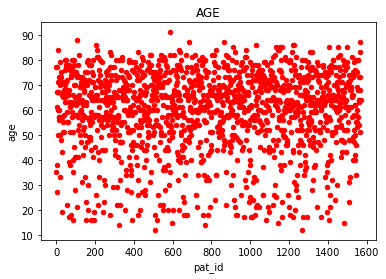

In [17]:
df_age.plot(kind = 'scatter',
        x = 'pat_id',
        y = 'age',
        color = 'red')
  
# set the title
plt.title('AGE')
  
# show the plot
plt.show()

In [18]:
# data = pd.to_datetime(data['day', 'date_admission', 'date_admission'])
data[[ 'date_admission', 'date_discharge']] = data[[ 'date_admission', 'date_discharge']].apply(pd.to_datetime)
data

,pat_id,day,hour,parameter,value,age,date_admission,date_discharge
0,0,2016-01-05,23,blood_pressure,104.543181,35.0,2016-01-05,2016-01-07
1,0,2016-01-06,0,blood_pressure,110.542544,35.0,2016-01-05,2016-01-07
2,0,2016-01-06,1,blood_pressure,133.832002,35.0,2016-01-05,2016-01-07
3,0,2016-01-06,2,blood_pressure,133.067666,35.0,2016-01-05,2016-01-07
4,0,2016-01-06,3,blood_pressure,134.566003,35.0,2016-01-05,2016-01-07
...,...,...,...,...,...,...,...,...
109047,1568,2016-01-19,10,blood_pressure,143.166335,64.0,2016-01-18,2016-01-19
109048,1568,2016-01-19,11,blood_pressure,145.432503,64.0,2016-01-18,2016-01-19
109049,1568,2016-01-19,12,blood_pressure,144.899670,64.0,2016-01-18,2016-01-19
109050,1568,2016-01-19,12,respiration_rate,4.000000,64.0,2016-01-18,2016-01-19


In [21]:
df=data[data["pat_id"]==1]
df

,pat_id,day,hour,parameter,value,age,date_admission,date_discharge
53,1,2014-07-04,13,blood_pressure,102.430358,77.0,2014-07-04,2014-07-06
54,1,2014-07-04,14,blood_pressure,113.898307,77.0,2014-07-04,2014-07-06
55,1,2014-07-04,14,temperature,35.994868,77.0,2014-07-04,2014-07-06
56,1,2014-07-04,15,blood_pressure,123.934337,77.0,2014-07-04,2014-07-06
57,1,2014-07-04,16,blood_pressure,124.619658,77.0,2014-07-04,2014-07-06
58,1,2014-07-04,16,temperature,35.789744,77.0,2014-07-04,2014-07-06
59,1,2014-07-04,17,blood_pressure,103.033502,77.0,2014-07-04,2014-07-06
60,1,2014-07-04,18,blood_pressure,122.441527,77.0,2014-07-04,2014-07-06
61,1,2014-07-04,19,blood_pressure,126.532169,77.0,2014-07-04,2014-07-06
62,1,2014-07-04,20,blood_pressure,118.434670,77.0,2014-07-04,2014-07-06


ValueError: could not convert string to float: '2014-07-04'

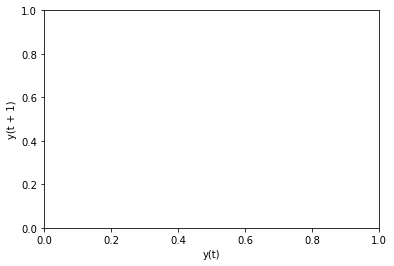

In [23]:
# create a scatter plot

from matplotlib import pyplot
from pandas.plotting import lag_plot

lag_plot(df)
pyplot.show()

In [24]:
data.isnull().any()

pat_id            False
day               False
hour              False
parameter         False
value             False
age               False
date_admission    False
date_discharge    False
dtype: bool

In [25]:
data.describe()

,pat_id,hour,value,age
count,109052.000000,109052.000000,109052.000000,109052.000000
mean,872.776519,11.138787,84.643211,59.027290
std,440.129090,7.016464,58.915737,16.565187
min,0.000000,0.000000,-0.010000,12.000000
25%,515.000000,5.000000,10.010000,50.000000
50%,908.000000,11.000000,105.698002,63.000000
75%,1259.000000,17.000000,128.611529,71.000000
max,1568.000000,23.000000,592.000007,91.000000


,pat_id,hour,value,age
pat_id,1.000000,0.005715,0.001645,-0.019569
hour,0.005715,1.000000,0.029523,0.001972
value,0.001645,0.029523,1.000000,0.019329
age,-0.019569,0.001972,0.019329,1.000000


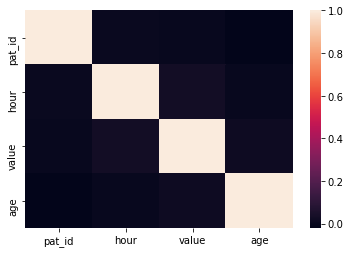

In [19]:
corr = data.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

corr

In [20]:
data.dtypes

pat_id                     int64
day                       object
hour                       int64
parameter                 object
value                    float64
age                      float64
date_admission    datetime64[ns]
date_discharge    datetime64[ns]
dtype: object